# **Lab 4 CFG and Parsing**
The goal of this session is to answer the following:


*  How can we use a formal grammar(CFG) to describe the structure of an unlimited set of sentences?

*   How do we represent the structure of sentences using syntax trees?
*   How do parsers analyze a sentence and automatically build a syntax tree?







# What is CFG? Let's recap...
Basically, CFG or Context Free Grammar is a mechanism for language specification. One way of understanding the relationship between syntactic categories (such as noun, verb, preposition, etc) and their respective phrases. It consists of rules, non-terminals, terminals and start symbol. 
 


# Parsing
Parsing or syntactic analysis is the process of analysing a string of symbols, either in natural language or in computer languages, conforming to the rules of a formal grammar. 


## Now let's create a grammar

In [1]:
import nltk
from nltk import CFG

grammar = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  V -> "saw" | "ate"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "dog" | "cat" | "cookie" | "park"
  PP -> P NP
  P -> "in" | "on" | "by" | "with"
  """)


## Parsing a sentence..
Now let’s parse a sentence based on the grammar


In [2]:
sent = "Mary saw the dog".split()
rd_parser = nltk.RecursiveDescentParser(grammar)
for p in rd_parser.parse(sent):
    print (p)
    


(S (NP Mary) (VP (V saw) (NP (Det the) (N dog))))


## Parsing
Now try to use other possible sentences to parse
 eg. **John ate the cookie**


In [3]:
#Your program here...
sent2 = "John ate the cookie".split()
rd_parser = nltk.RecursiveDescentParser(grammar)
for p in rd_parser.parse(sent2):
    print (p)
    


(S (NP John) (VP (V ate) (NP (Det the) (N cookie))))


And try to parse the following sentence (that do not follow the rules)..eg. **Bob the cookie cat**. What's the output?


In [4]:
#Your program here 
sent3 = "Bob the cookie cat".split()
rd_parser = nltk.RecursiveDescentParser(grammar)
for p in rd_parser.parse(sent3):
    print (p)

No output 

# Generating sentences from CFG
We can generate sentences from a given CFG.

Now let’s try a sample grammar..


Use the following command to generate random sentences from the CFG

*for sentence in generate(grammar, n=10):*


...     *print(' '.join(sentence))* 


The complete code :

In [5]:
import nltk
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG

grammar = CFG.fromstring(demo_grammar)
print(grammar)

for sentence in generate(grammar, n=10): #generate 10 random sentences from the grammar
    print(' '.join(sentence))



Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'
the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the man walked in the man
the man walked in the park
the man walked in the dog


# How about ambiguous sentence?

Let’s see what the output for sentence with structural ambiguity.

We will use the classic example:
**I shot an elephant in my pyjamas.**


In [6]:
import nltk
from nltk import CFG
from nltk.tree import *

groucho_grammar = nltk.CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | Det N PP | 'I'
 VP -> V NP | VP PP
 Det -> 'an' | 'my'
 N -> 'elephant' | 'pajamas'
 V -> 'shot'
 P -> 'in'
 """)
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)# display the result in flat structure
    tree.pretty_print()

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
     S                                       
  ___|______________                          
 |                  VP                       
 |         _________|__________               
 |        VP                   PP            
 |    ____|___              ___|___           
 |   |        NP           |       NP        
 |   |     ___|_____       |    ___|_____     
 NP  V   Det        N      P  Det        N   
 |   |    |         |      |   |         |    
 I  shot  an     elephant  in  my     pajamas

(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))
     S                                   
  ___|__________                          
 |              VP                       
 |    __________|______                   
 |   |                 NP                
 |   |     ____________|___               
 |   |    |     |       

What can you observe?

There are two parse results. 
Basically, there will be two parse trees like this:



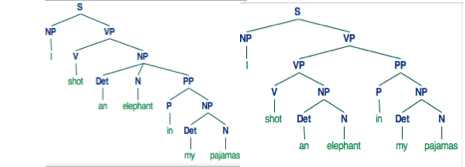


# Task for today 

First, write a program to create a simple grammar as follows:

S -> NP VP

 VP -> VP PP

 VP -> VERB NP

 VP -> VERB

 NP -> DET NOM

 NOM -> ADJ NOM

 NOM -> NOUN

 PP -> PREP NP

 DET -> "the"

 ADJ -> "big"|"brown"|"red"

 NOUN -> "bear"|"tree"|"cat"|"apple"|"box"

 VERB -> "sat"|"slept"|"jumped"
 
 PREP -> "under"|"on"|"above" 


1. Now, parse three sentences that meet the rules from the grammar and display the output

2. Next, show how you would have to modify the grammar to handle the sentence **the bear in the white hat ran under the tree**. Display the output. You can do this in a new program.

Upload your completed program in UKMFolio the latest by **18 November 2022**.


In [10]:
#Your program here
import nltk
from nltk import CFG
from nltk.tree import *

groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> VP PP
VP -> VERB NP
VP -> VERB
NP -> DET NOM
NOM -> ADJ NOM
NOM -> NOUN
PP -> PREP NP
DET -> "the"
ADJ -> "big"|"brown"|"red"
NOUN -> "bear"|"tree"|"cat"|"apple"|"box"
VERB -> "sat"|"slept"|"jumped"
PREP -> "under"|"on"|"above"
 """)
sent = [ 'the', 'big', 'red', 'bear', 'slept', 'under', 'the', 'tree']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)# display the result in flat structure
    tree.pretty_print()

sent2 = [ 'the', 'brown', 'bear', 'sat', 'on', 'the', 'box']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent2):
    print(tree)# display the result in flat structure
    tree.pretty_print()

sent3 = [ 'the', 'cat', 'slept', 'under', 'the','tree']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent3):
    print(tree)# display the result in flat structure
    tree.pretty_print()


(S
  (NP (DET the) (NOM (ADJ big) (NOM (ADJ red) (NOM (NOUN bear)))))
  (VP
    (VP (VERB slept))
    (PP (PREP under) (NP (DET the) (NOM (NOUN tree))))))
                     S                               
          ___________|________________                
         NP                           VP             
  _______|___               __________|___            
 |          NOM            |              PP         
 |    _______|___          |      ________|___        
 |   |          NOM        |     |            NP     
 |   |        ___|___      |     |         ___|___    
 |   |       |      NOM    VP    |        |      NOM 
 |   |       |       |     |     |        |       |   
DET ADJ     ADJ     NOUN  VERB  PREP     DET     NOUN
 |   |       |       |     |     |        |       |   
the big     red     bear slept under     the     tree

(S
  (NP (DET the) (NOM (ADJ brown) (NOM (NOUN bear))))
  (VP (VP (VERB sat)) (PP (PREP on) (NP (DET the) (NOM (NOUN box))))))
         

In [11]:
#Your program here
import nltk
from nltk import CFG
from nltk.tree import *

groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> VP PP 
VP -> VERB NP
VP -> VERB
NP -> DET NOM
NOM -> ADJ NOM | NOM PP
NOM -> NOUN
PP -> PREP NP
DET -> "the"
ADJ -> "big"|"brown"|"red"|"white"
NOUN -> "bear"|"tree"|"cat"|"apple"|"box"|"hat"
VERB -> "sat"|"slept"|"jumped"|"ran"
PREP -> "under"|"on"|"above"|"in"
 """)
sent = ['the', 'bear', 'in', 'the', 'white', 'hat','ran','under', 'the', 'tree'] 
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)# display the result in flat structure
    tree.pretty_print()

(S
  (NP
    (DET the)
    (NOM
      (NOM (NOUN bear))
      (PP
        (PREP in)
        (NP (DET the) (NOM (ADJ white) (NOM (NOUN hat)))))))
  (VP
    (VP (VERB ran))
    (PP (PREP under) (NP (DET the) (NOM (NOUN tree))))))
                        S                                       
           _____________|________________________                
          NP                                     |              
  ________|____                                  |               
 |            NOM                                |              
 |    _________|___                              |               
 |   |             PP                            VP             
 |   |     ________|____               __________|___            
 |   |    |             NP            |              PP         
 |   |    |     ________|____         |      ________|___        
 |   |    |    |            NOM       |     |            NP     
 |   |    |    |         ____|___     |     |       

NAME: CHONG WEI YI


MATRIC NO: A180497